🎯 Desafio dia 78 — Rotatividade de Funcionários

📂 Dataset: desafio_dia_78_rotatividade_funcionarios.csv

🔍 Contexto: A equipe de Recursos Humanos está monitorando a rotatividade de funcionários para entender melhor os padrões de desligamento e permanência na empresa.

🛠️ Tarefas do desafio:

🧹 Tratamento de dados
- Preencha os valores ausentes da coluna tempo_empresa_anos com a média.

- Preencha os valores ausentes da coluna genero com o valor mais frequente.

📊 Análise geral
- Qual setor apresenta maior taxa de desligamento?

- Qual a média de idade dos funcionários desligados?

📈 Visualização de dados
- Crie um boxplot mostrando a distribuição do tempo de empresa por situação (Ativo vs Desligado).

🤖 Machine Learning - Classificação
- Crie um modelo para prever a situacao (Ativo ou Desligado) com base em:

    idade, tempo_empresa_anos, setor, genero e escolaridade

    Use train_test_split, get_dummies, RandomForestClassifier e avalie a acurácia com accuracy_score.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("desafio_dia_78_rotatividade_funcionarios.csv")
df.head()

,id_funcionario,setor,idade,genero,tempo_empresa_anos,escolaridade,situacao
0,7001,Administrativo,38,Masculino,2.7,Superior,Ativo
1,7002,TI,19,Feminino,2.8,Ensino Médio,Desligado
2,7003,Administrativo,22,Masculino,2.9,Superior,Desligado
3,7004,Operações,11,Masculino,0.5,Ensino Médio,Ativo
4,7005,Operações,38,Feminino,5.0,Superior,Desligado


In [3]:
#Preencha os valores ausentes da coluna tempo_empresa_anos com a média.
df["tempo_empresa_anos"] = df["tempo_empresa_anos"].fillna(df["tempo_empresa_anos"].mean())
df["tempo_empresa_anos"].isna().sum()

0

In [5]:
#Preencha os valores ausentes da coluna genero com o valor mais frequente.
df["genero"] = df["genero"].fillna(df["genero"].mode()[0])
df["genero"].isna().sum()

0

In [11]:
#Qual setor apresenta maior taxa de desligamento?
setor_desligamento = df[df["situacao"] == "Desligado"]["setor"].value_counts(normalize=True) * 100
print(setor_desligamento)

setor
Administrativo    22.826087
Operações         21.739130
RH                20.652174
Vendas            18.478261
TI                16.304348
Name: proportion, dtype: float64


In [14]:
#Qual a média de idade dos funcionários desligados?
media_idade_funcionarios_desligados = df[df["situacao"] == "Desligado"]["idade"].mean().round(2)
print(media_idade_funcionarios_desligados)

34.05


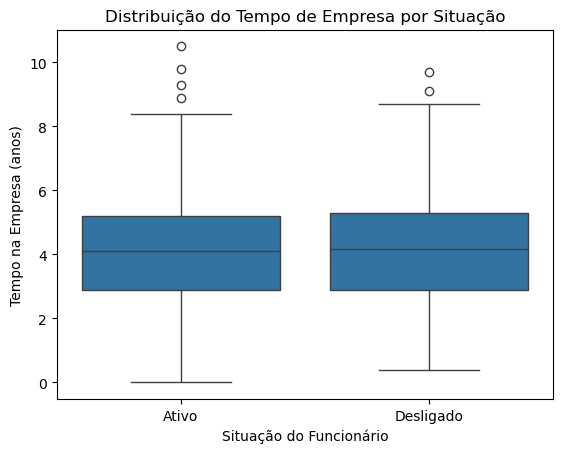

In [16]:
#Crie um boxplot mostrando a distribuição do tempo de empresa por situação (Ativo vs Desligado).
sns.boxplot(data=df, x="situacao", y="tempo_empresa_anos")
plt.title("Distribuição do Tempo de Empresa por Situação")
plt.xlabel("Situação do Funcionário")
plt.ylabel("Tempo na Empresa (anos)")
plt.show()

In [22]:
#Crie um modelo para prever a situacao (Ativo ou Desligado) com base em:
X = df[["idade", "tempo_empresa_anos", "setor", "genero", "escolaridade"]]
y = df["situacao"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7933333333333333
